# Prototype to analyze long recordings of fiber data. 

* 11/25/2024 setup

In [1]:
from datetime import timedelta
from os.path import join
import matplotlib.pyplot as plt


import src.fiberphotometry as fp

In [2]:
def calculate_recording_start_times(recording_start_datetime, onsets):
    """
    Calculate a list of cumulative recording start times.

    Parameters:
    - recording_start_datetime: datetime.datetime
        The start date and time as a datetime object.
    - onsets: list or array-like
        The list of onset times in seconds.

    Returns:
    - list of datetime objects representing the start times.
    """
    # Initialize the `recording_start_times` list
    recording_start_times = []

    # Set the initial recording time
    current_time = recording_start_datetime + timedelta(seconds=float(onsets[0]))
    recording_start_times.append(current_time)

    # Iterate over the remaining onsets to add cumulative times
    for onset in onsets[1:]:
        current_time += timedelta(seconds=float(onset))
        recording_start_times.append(current_time)

    return recording_start_times


def format_datetime_for_filename(dt):
    """
    Format a datetime object into a string suitable for use in a filename.

    Parameters:
    - dt: datetime.datetime
        The datetime object to format.

    Returns:
    - str: A string formatted for use in a filename.
    """
    return dt.strftime("%Y%m%d_%H%M%S")


In [4]:
data_path = "E:/test/42_1-241030-092508/"
save_dir = "analysis"
save_path = join(data_path, save_dir)

In [5]:
with open(join(data_path, "StoresListing.txt"), "r") as file:
    lines = file.readlines()
lines

['Experiment: multiday2\n',
 'Subject: 42_1\n',
 'User: User\n',
 'Date: 10/30/2024\n',
 'Time: 9:25:11am\n',
 '\n',
 'Object ID : RZ10x(1) - RZn Processor\n',
 ' Rate     : 6103.5 Hz\n',
 ' Store ID : Note\n',
 '\n',
 'Object ID : FibPho1 - Fiber Photometry\n',
 ' Store ID : 405A\n',
 '  Format  : Float-32\n',
 '  Scale   : Unity\n',
 '  Rate    : 1017.3 Hz\n',
 ' Store ID : 465A\n',
 '  Format  : Float-32\n',
 '  Scale   : Unity\n',
 '  Rate    : 1017.3 Hz\n',
 ' Store ID : Fi1d\n',
 '  Format  : Float-32\n',
 '  Scale   : Unity\n',
 '  Rate    : 6103.5 Hz\n',
 ' Store ID : Fi1i\n',
 '  Mode    : Single scalar\n',
 '  Format  : Float-32\n',
 '  Scale   : Unity\n',
 '  Pre Cap : 0.00 ms\n',
 ' Store ID : Fi1r\n',
 '  Format  : Float-32\n',
 '  Scale   : Unity\n',
 '  Rate    : 6103.5 Hz\n',
 ' Store ID : TC1_\n',
 '  Source  : Strobe input\n',
 '  Invert  : No\n',
 '  Offset  : Yes\n',
 '  Count   : Yes\n',
 ' Store ID : F1c1\n',
 '  Format  : Float-32\n',
 '  Scale   : Unity\n',
 '  

In [6]:
recording_epocs = fp.ImportTDTData(tank_path=data_path, kwargs={"evtype": ["epocs"]})

Found Synapse note file: E:/test/42_1-241030-092508/Notes.txt
date changed to 10/31/2024

date changed to 11/01/2024

date changed to 11/02/2024

date changed to 11/03/2024

read from t=0s to t=345649.34s


In [18]:
onsets = recording_epocs.data.epocs.TC1_.onset.astype(float)
offsets = recording_epocs.data.epocs.TC1_.offset.astype(float)
on_off_times = {
    "onsets": onsets,
    "offsets": offsets,
}
recording_start_date_time = recording_epocs.data.info.start_date
onset_add_time = 10  # seconds to add onset time to get rid of the artifact
recording_starts = calculate_recording_start_times(
    recording_start_date_time, on_off_times["onsets"]
)

In [20]:
recording_starts

[datetime.datetime(2024, 10, 30, 9, 25, 33, 426910),
 datetime.datetime(2024, 10, 30, 10, 25, 57, 139596),
 datetime.datetime(2024, 10, 30, 12, 26, 21, 137978),
 datetime.datetime(2024, 10, 30, 15, 26, 45, 422056),
 datetime.datetime(2024, 10, 30, 19, 27, 9, 991830),
 datetime.datetime(2024, 10, 31, 0, 27, 34, 847300),
 datetime.datetime(2024, 10, 31, 6, 27, 59, 988466),
 datetime.datetime(2024, 10, 31, 13, 28, 25, 415328),
 datetime.datetime(2024, 10, 31, 21, 28, 51, 127886),
 datetime.datetime(2024, 11, 1, 6, 29, 17, 126140),
 datetime.datetime(2024, 11, 1, 16, 29, 43, 410090),
 datetime.datetime(2024, 11, 2, 3, 30, 9, 979736),
 datetime.datetime(2024, 11, 2, 15, 30, 36, 835078),
 datetime.datetime(2024, 11, 3, 4, 31, 3, 976116),
 datetime.datetime(2024, 11, 3, 18, 31, 31, 402850),
 datetime.datetime(2024, 11, 4, 9, 31, 59, 115280),
 datetime.datetime(2024, 11, 5, 1, 32, 27, 113406),
 datetime.datetime(2024, 11, 5, 18, 32, 55, 397228),
 datetime.datetime(2024, 11, 6, 12, 33, 23, 9667

In [ ]:
t1 = on_off_times["onsets"][2] + onset_add_time
t2 = on_off_times["offsets"][2]
t1, t2

(7233.99838208, 7824.04599808)

In [10]:
data_segment = fp.ImportTDTData(
    data_path,
    kwargs={
        "t1": t1,
        "t2": t2,
    },
)

Found Synapse note file: E:/test/42_1-241030-092508/Notes.txt
date changed to 10/31/2024

date changed to 11/01/2024

date changed to 11/02/2024

date changed to 11/03/2024

read from t=7234.0s to t=7824.05s


c:\Users\gt225\anaconda3\envs\fiber-photometry-analysis\lib\site-packages\tdt\TDTbin2py.py:1596: RuntimeWarning: overflow encountered in scalar subtract
  filter_ind[jj] = np.concatenate([-np.arange(nchan, 0, -1) + temp[0], filter_ind[jj]])
c:\Users\gt225\anaconda3\envs\fiber-photometry-analysis\lib\site-packages\tdt\TDTbin2py.py:2083: RuntimeWarning: overflow encountered in scalar subtract
  minSample = ltSample - tdSample


In [11]:
data_segment.data.streams._405A.data.shape


(600228,)

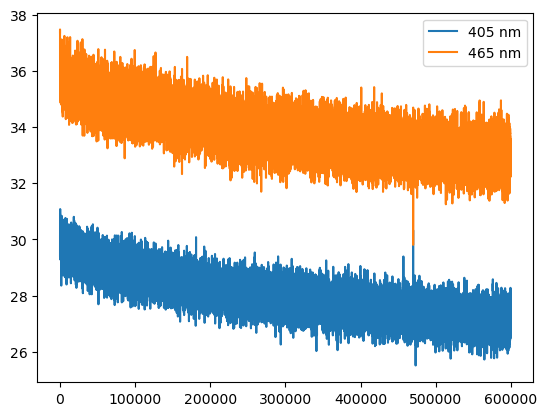

In [12]:
plt.plot(data_segment.data.streams._405A.data)
plt.plot(data_segment.data.streams._465A.data)
plt.legend(["405 nm", "465 nm"])
plt.show()

In [13]:
dff = fp.FiberPhotometryAnalysis(
    data_path,
    kwargs={
        "t1": t1,
        "t2": t2,
    },
)

Found Synapse note file: E:/test/42_1-241030-092508/Notes.txt
date changed to 10/31/2024

date changed to 11/01/2024

date changed to 11/02/2024

date changed to 11/03/2024

read from t=7234.0s to t=7824.05s


In [14]:
trace = dff.calculate_deltaf_f()

In [15]:
trace.shape

(600228,)

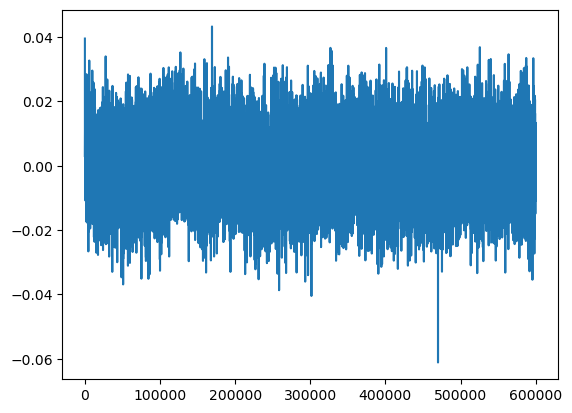

In [16]:
plt.plot(trace)